# Generate SHAP values : JiHoon

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import math
import time
import parmap
import pickle
import multiprocessing

from imagen_post_hoc_helper import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
num_cores = multiprocessing.cpu_count()
print(f'Available CPU cores: {num_cores}')
num_cores = math.floor(num_cores/3)
print(f'Set CPU cores: {num_cores}')

In [ ]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

### 10. Get the SHAP value

#### Diagnosis: X:BL to y:FU3 on causal onset0

<b> Load the data and the model </b>

In [ ]:
naming = "causal0"
h5_model = "/ritter/share/projects/Roshan_share_data/post_hoc_milena/results/newlbls-clean-bl-espad-fu3-19a-binge-causal-onset0-n477/*/"
holdout = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset0-n78.h5"

# main analysis
MODELS = posthoc.get_model(h5_model)

holdout_dir = holdout
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
      f"{ho_list[0].shape}, {ho_list[1].shape}")

# generate the SHAP input list of the holdout ONLY SVM-rbf
ho_INPUT = posthoc.get_list(MODELS, ho_X, "All")
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}")#, {ho_INPUT}")

In [ ]:
# analysis 2
naming = "causal1"
h5_model = "/ritter/share/projects/Roshan_share_data/post_hoc_milena/results/newlbls-clean-bl-espad-fu3-19a-binge-causal-onset1-n565/*/"
holdout = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset1-n90.h5"

# main analysis
MODELS = posthoc.get_model(h5_model)

holdout_dir = holdout
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
      f"{ho_list[0].shape}, {ho_list[1].shape}")

# generate the SHAP input list of the holdout ONLY SVM-rbf
ho_INPUT = posthoc.get_list(MODELS, ho_X, "All")
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}")#, {ho_INPUT}")

Attention! Computation tooks long. Please double check the arguemnts before excute it!

In [ ]:
# %time
# INPUT = ho_INPUT[0]
# _ = posthoc.get_SHAP(INPUT, 'Milena')

In [ ]:
# Multi processing
INPUT = ho_INPUT
start_time = time.time()
_ = parmap.map(posthoc.get_SHAP, INPUT, 'h5causal0', pm_pbar=True, pm_processes=num_cores)
print("--- %s seconds ---" % (time.time() - start_time))

### 11. Save the mean|SHAP| value

#### load the feature derivatives and mean, std |SHAP value|

Please refer to <i>to_abs_SHAP()</i> in <i>imagen_posthocloader.py</i>, and load the file

copy `*.sav` to `/ritter/share/IMAGEN/posthoc/explainer/*`

In [ ]:
# causal0
H5_causal0 = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset0-n78.h5"
GB_causal0 = ["GB0_causal0.sav", "GB1_causal0.sav", "GB2_causal0.sav", "GB3_causal0.sav", "GB4_causal0.sav", "GB5_causal0.sav", "GB6_causal0.sav"]
LR_causal0 = ["LR0_causal0.sav", "LR1_causal0.sav", "LR2_causal0.sav", "LR3_causal0.sav", "LR4_causal0.sav", "LR5_causal0.sav", "LR6_causal0.sav"]
SVM_lin_causal0 = ["SVM-lin0_causal0.sav", "SVM-lin1_causal0.sav", "SVM-lin2_causal0.sav", "SVM-lin3_causal0.sav", "SVM-lin4_causal0.sav", "SVM-lin5_causal0.sav", "SVM-lin6_causal0.sav"]
SVM_rbf_causal0 = ["SVM-rbf0_causal0.sav", "SVM-rbf1_causal0.sav", "SVM-rbf2_causal0.sav", "SVM-rbf3_causal0.sav", "SVM-rbf4_causal0.sav", "SVM-rbf5_causal0.sav", "SVM-rbf6_causal0.sav"]

In [ ]:
SHAP0 = GB_causal0 + LR_causal0 + SVM_lin_causal0 + SVM_rbf_causal0
Causal0_SHAP = posthoc.to_abs_SHAP(H5_causal0, SHAP0, "causal0", save=True)

In [ ]:
# causal1
H5_causal1 = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset1-n90.h5"
GB_causal1 = ["GB0_causal1.sav", "GB1_causal1.sav", "GB2_causal1.sav", "GB3_causal1.sav", "GB4_causal1.sav", "GB5_causal1.sav", "GB6_causal1.sav"]
LR_causal1 = ["LR0_causal1.sav", "LR1_causal1.sav", "LR2_causal1.sav", "LR3_causal1.sav", "LR4_causal1.sav", "LR5_causal1.sav", "LR6_causal1.sav"]
SVM_lin_causal1 = ["SVM-lin0_causal1.sav", "SVM-lin1_causal1.sav", "SVM-lin2_causal1.sav", "SVM-lin3_causal1.sav", "SVM-lin4_causal1.sav", "SVM-lin5_causal1.sav", "SVM-lin6_causal1.sav"]
SVM_rbf_causal1 = ["SVM-rbf0_causal1.sav", "SVM-rbf1_causal1.sav", "SVM-rbf2_causal1.sav", "SVM-rbf3_causal1.sav", "SVM-rbf4_causal1.sav", "SVM-rbf5_causal1.sav", "SVM-rbf6_causal1.sav"]

In [ ]:
SHAP1 = GB_causal1 + LR_causal1 + SVM_lin_causal1 + SVM_rbf_causal1
Causal1_SHAP = posthoc.to_abs_SHAP(H5_causal1, SHAP1, "causal1", save=True)

#### load the mean of mean, std |SHAP value|

In [ ]:
Causal0_SHAP = posthoc.read_SHAP('all_causal0_SHAP.csv')
Causal1_SHAP = posthoc.read_SHAP('all_causal1_SHAP.csv')

#### load and save the SHAP value subject by subject

In [ ]:
# causal0
for MD in GB_causal0:
    posthoc.load_SHAP(H5_causal0, MD)#, save=True)
for MD in LR_causal0:
    posthoc.load_SHAP(H5_causal0, MD)#, save=True)
for MD in SVM_lin_causal0:
    posthoc.load_SHAP(H5_causal0, MD)#, save=True)
for MD in SVM_rbf_causal0:
    posthoc.load_SHAP(H5_causal0, MD)#, save=True)
# causal1
for MD in GB_causal1:
    posthoc.load_SHAP(H5_causal1, MD)#, save=True)
for MD in LR_causal1:
    posthoc.load_SHAP(H5_causal1, MD)#, save=True)
for MD in SVM_lin_causal1:
    posthoc.load_SHAP(H5_causal1, MD)#, save=True)
for MD in SVM_rbf_causal1:
    posthoc.load_SHAP(H5_causal1, MD)#, save=True)

<b> Case: SHAP value of the SVM-rbf in all tp </b>

In [ ]:
SVM_rbf0_causal0 = posthoc.read_SHAP('all_SVM-rbf0_causal0_SHAP.csv')
SVM_rbf1_causal0 = posthoc.read_SHAP('all_SVM-rbf1_causal0_SHAP.csv')
SVM_rbf2_causal0 = posthoc.read_SHAP('all_SVM-rbf2_causal0_SHAP.csv')
SVM_rbf3_causal0 = posthoc.read_SHAP('all_SVM-rbf3_causal0_SHAP.csv')
SVM_rbf4_causal0 = posthoc.read_SHAP('all_SVM-rbf4_causal0_SHAP.csv')
SVM_rbf5_causal0 = posthoc.read_SHAP('all_SVM-rbf5_causal0_SHAP.csv')
SVM_rbf6_causal0 = posthoc.read_SHAP('all_SVM-rbf6_causal0_SHAP.csv')
SVM_rbf_list = [SVM_rbf0_causal0, SVM_rbf1_causal0, SVM_rbf2_causal0,
                SVM_rbf3_causal0, SVM_rbf4_causal0, SVM_rbf5_causal0, SVM_rbf6_causal0]
SVM_rbf_causal0 = posthoc.to_SHAP(SVM_rbf_list, 'all_SVM-rbf_causal0_SHAP.csv')#, save=True)

In [ ]:
SVM_rbf0_causal1 = posthoc.read_SHAP('all_SVM-rbf0_causal1_SHAP.csv')
SVM_rbf1_causal1 = posthoc.read_SHAP('all_SVM-rbf1_causal1_SHAP.csv')
SVM_rbf2_causal1 = posthoc.read_SHAP('all_SVM-rbf2_causal1_SHAP.csv')
SVM_rbf3_causal1 = posthoc.read_SHAP('all_SVM-rbf3_causal1_SHAP.csv')
SVM_rbf4_causal1 = posthoc.read_SHAP('all_SVM-rbf4_causal1_SHAP.csv')
SVM_rbf5_causal1 = posthoc.read_SHAP('all_SVM-rbf5_causal1_SHAP.csv')
SVM_rbf6_causal1 = posthoc.read_SHAP('all_SVM-rbf6_causal1_SHAP.csv')
SVM_rbf_list = [SVM_rbf0_causal1, SVM_rbf1_causal1, SVM_rbf2_causal1,
                SVM_rbf3_causal1, SVM_rbf4_causal1, SVM_rbf5_causal1, SVM_rbf6_causal1]
SVM_rbf_causal1 = posthoc.to_SHAP(SVM_rbf_list, 'all_SVM-rbf_causal1_SHAP.csv')#, save=True)

In [ ]:
SVM_rbf_causal0.groupby('Trial').std()

In [ ]:
SVM_rbf_causal1.groupby('Trial').std()

### 12. Load the mean of features values

In [ ]:
# FU3
H5_causal0 = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset0-n78.h5"
GB_causal0 = ["GB0_causal0.sav", "GB1_causal0.sav", "GB2_causal0.sav", "GB3_causal0.sav", "GB4_causal0.sav", "GB5_causal0.sav", "GB6_causal0.sav"]
LR_causal0 = ["LR0_causal0.sav", "LR1_causal0.sav", "LR2_causal0.sav", "LR3_causal0.sav", "LR4_causal0.sav", "LR5_causal0.sav", "LR6_causal0.sav"]
SVM_lin_causal0 = ["SVM-lin0_causal0.sav", "SVM-lin1_causal0.sav", "SVM-lin2_causal0.sav", "SVM-lin3_causal0.sav", "SVM-lin4_causal0.sav", "SVM-lin5_causal0.sav", "SVM-lin6_causal0.sav"]
SVM_rbf_causal0 = ["SVM-rbf0_causal0.sav", "SVM-rbf1_causal0.sav", "SVM-rbf2_causal0.sav", "SVM-rbf3_causal0.sav", "SVM-rbf4_causal0.sav", "SVM-rbf5_causal0.sav", "SVM-rbf6_causal0.sav"]

# FU2
H5_causal1 = "newholdout-clean-bl-espad-fu3-19a-binge-causal-onset1-n90.h5"
GB_causal1 = ["GB0_causal1.sav", "GB1_causal1.sav", "GB2_causal1.sav", "GB3_causal1.sav", "GB4_causal1.sav", "GB5_causal1.sav", "GB6_causal1.sav"]
LR_causal1 = ["LR0_causal1.sav", "LR1_causal1.sav", "LR2_causal1.sav", "LR3_causal1.sav", "LR4_causal1.sav", "LR5_causal1.sav", "LR6_causal1.sav"]
SVM_lin_causal1 = ["SVM-lin0_causal1.sav", "SVM-lin1_causal1.sav", "SVM-lin2_causal1.sav", "SVM-lin3_causal1.sav", "SVM-lin4_causal1.sav", "SVM-lin5_causal1.sav", "SVM-lin6_causal1.sav"]
SVM_rbf_causal1 = ["SVM-rbf0_causal1.sav", "SVM-rbf1_causal1.sav", "SVM-rbf2_causal1.sav", "SVM-rbf3_causal1.sav", "SVM-rbf4_causal1.sav", "SVM-rbf5_causal1.sav", "SVM-rbf6_causal1.sav"]

<b> Case: Feature value (SHAP value > 0) of the SVM-rbf in all tp </b>

In [ ]:
SVM_rbf_POS_causal0_list = []
for data in SVM_rbf_causal0:
    df = posthoc.load_POS_Feature(H5_causal0, data)
    SVM_rbf_POS_causal0_list.append(df)
SVM_rbf_causal0_POS = posthoc.to_SHAP(SVM_rbf_POS_causal0_list, 'all_SVM-rbf_causal0_POS.csv')#, save=True)

In [ ]:
SVM_rbf_POS_causal1_list = []
for data in SVM_rbf_causal1:
    df = posthoc.load_POS_Feature(H5_causal1, data)
    SVM_rbf_POS_causal1_list.append(df)
SVM_rbf_causal1_POS = posthoc.to_SHAP(SVM_rbf_POS_causal1_list, 'all_SVM-rbf_causal1_POS.csv')#, save=True)

<b> Case: Feature value (SHAP value < 0) of the SVM-rbf in all tp </b>

In [ ]:
SVM_rbf_NEG_causal0_list = []
for data in SVM_rbf_causal0:
    df = posthoc.load_NEG_Feature(H5_causal0, data)
    SVM_rbf_NEG_causal0_list.append(df)
SVM_rbf_causal0_NEG = posthoc.to_SHAP(SVM_rbf_NEG_causal0_list, 'all_SVM-rbf_causal0_NEG.csv')#, save=True)

In [ ]:
SVM_rbf_NEG_causal1_list = []
for data in SVM_rbf_causal1:
    df = posthoc.load_NEG_Feature(H5_causal1, data)
    SVM_rbf_NEG_causal1_list.append(df)
SVM_rbf_causal1_NEG = posthoc.to_SHAP(SVM_rbf_NEG_causal1_list, 'all_SVM-rbf_causal1_NEG.csv')#, save=True)

<b> Case: Feature value (SHAP value = 0) of the SVM-rbf in all tp </b>

In [ ]:
SVM_rbf_ZER_causal0_list = []
for data in SVM_rbf_causal0:
    df = posthoc.load_ZER_Feature(H5_causal0, data)
    SVM_rbf_ZER_causal0_list.append(df)
SVM_rbf_causal0_ZER = posthoc.to_SHAP(SVM_rbf_ZER_causal0_list, 'all_SVM-rbf_causal0_ZER.csv')#, save=True)

In [ ]:
SVM_rbf_ZER_causal1_list = []
for data in SVM_rbf_causal1:
    df = posthoc.load_ZER_Feature(H5_causal1, data)
    SVM_rbf_ZER_causal1_list.append(df)
SVM_rbf_FU2_ZER = posthoc.to_SHAP(SVM_rbf_ZER_causal1_list, 'all_SVM-rbf_causal1_ZER.csv')#, save=True)

# SHAP results visualization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../post_hoc_jihoon/")
from imagen_post_hoc_helper import *

Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.


In [3]:
DATA_DIR = r"/ritter/share/data/IMAGEN"
SAVE_DIR = r"results/shap"
posthoc = IMAGEN_posthoc()

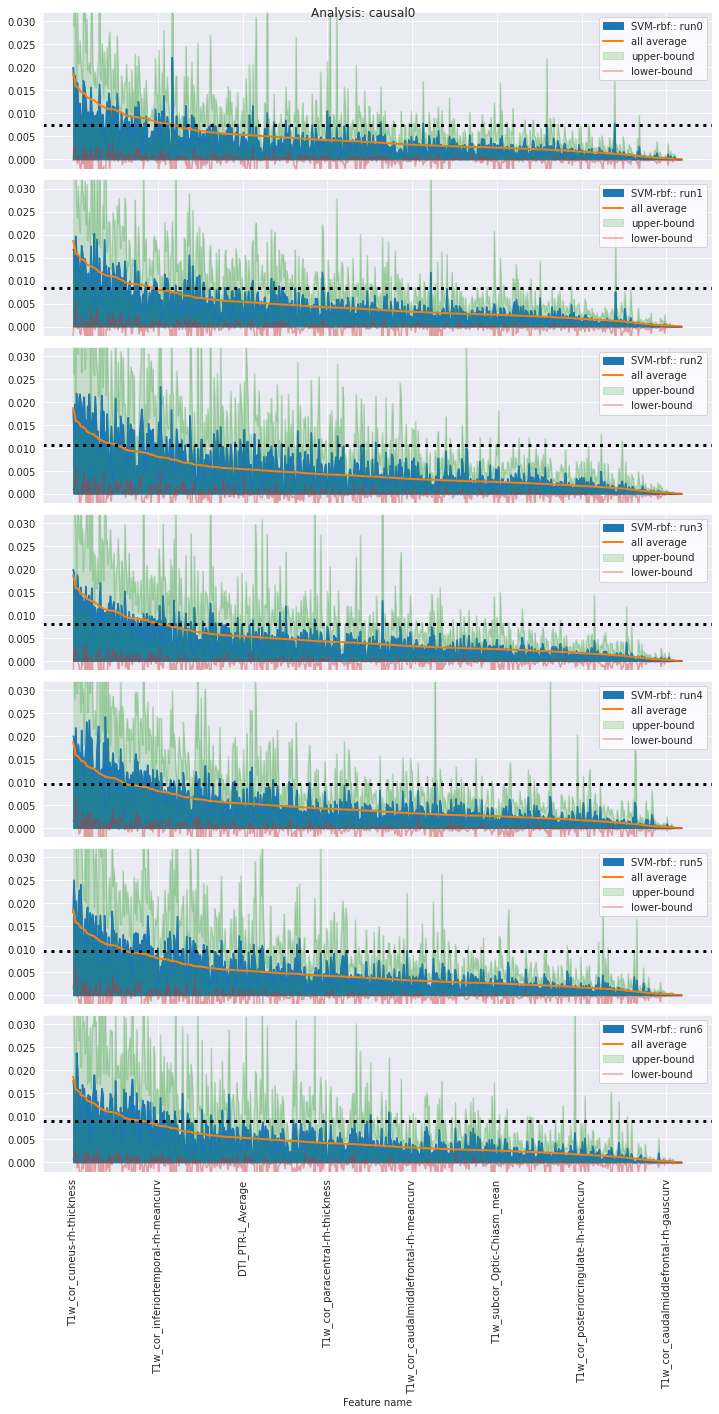

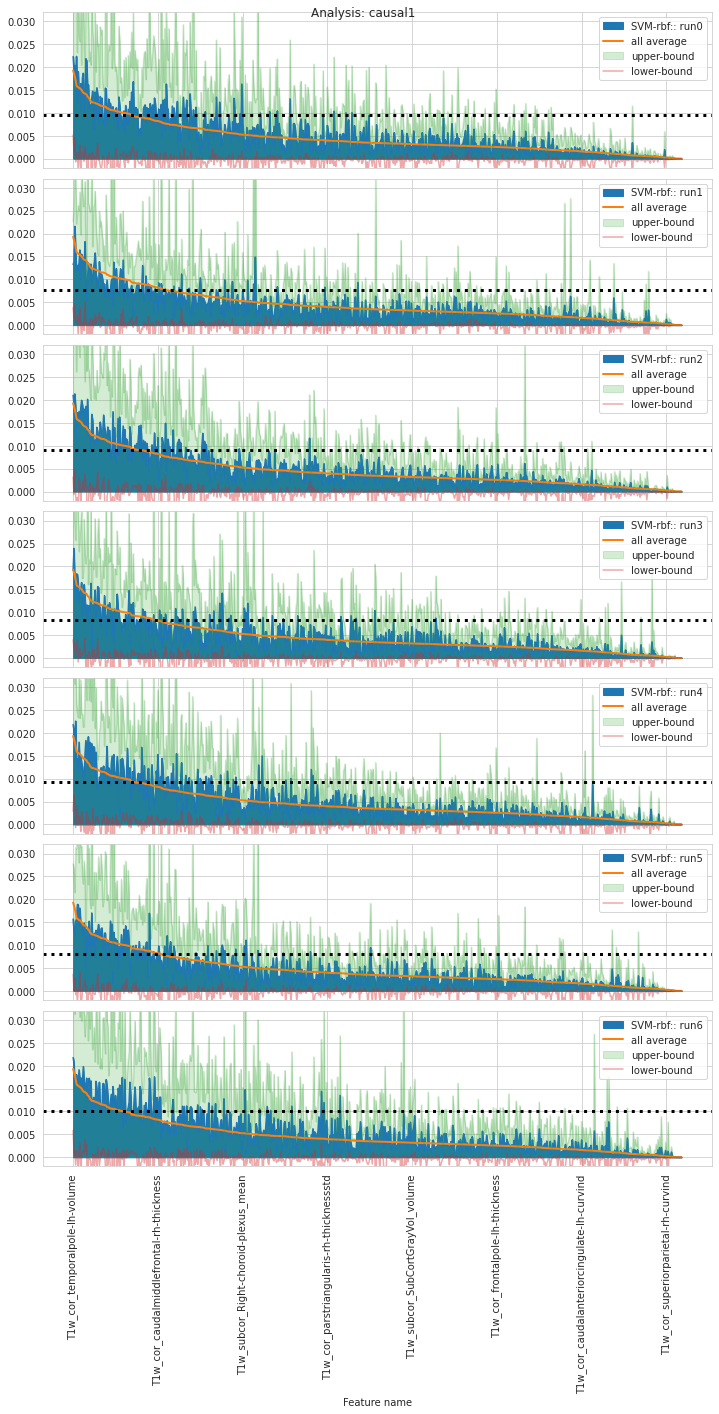

In [4]:
# for tp in ['causal0', 'causal1']:
for tp in ['causal0', 'causal1']:
    f, axes = plt.subplots(7,1, figsize=(10,20), sharex=True, sharey=True)
    sns.set_style('whitegrid')
    plt.suptitle(f'Analysis: {tp}')

    for i, axis in enumerate(axes.ravel()):
        df = posthoc.read_SHAP(f'all_{tp}_SHAP.csv').set_index('Feature name').filter(regex="SVM-rbf.*")
        df["all average"] =  df.filter(regex="SVM-rbf.* mean").apply(np.mean, axis=1)
        df = df.sort_values("all average", ascending=False)
        df.plot(y=f'SVM-rbf{i}_{tp} mean', label=f'SVM-rbf:: run{i}',  kind='area', 
                       rot=90, ax=axis, legend=True)
        df["all average"].plot(lw=2, label="all average", rot=90, ax=axis, legend=True)  

        axis.set_ylim([-0.002,0.032])

        # plot the upper and lower standard deviations in SHAP
        df[f'SVM-rbf{i}_{tp} std_up'] = df[f'SVM-rbf{i}_{tp} mean']  + df[f'SVM-rbf{i}_{tp} std'] 
        df[f'SVM-rbf{i}_{tp} std_down'] = df[f'SVM-rbf{i}_{tp} mean']  - df[f'SVM-rbf{i}_{tp} std']

        df.plot(y=f'SVM-rbf{i}_{tp} std_up', kind='area', label='upper-bound', rot=90, ax=axis, legend=True,  alpha=0.2, stacked=False)
        df.plot(y=f'SVM-rbf{i}_{tp} std_down', kind='line', label='lower-bound', rot=90, ax=axis, legend=True, alpha=0.4, stacked=False)

        axis.axhline(2*df[f'SVM-rbf{i}_{tp} mean'].mean(), ls='dotted',lw=3, color='k')
    #     df_sorted[f'SVM-rbf{i}_{tp} mean'].cumsum().plot.area(alpha=0.2, rot=90, ax=axis)
    # SHAP_SVMrbf.filter(regex='SVM-rbf.* std').sort_values(
    #     by='SVM-rbf_{tp} all std', ascending=False).drop(columns=['SVM-rbf_{tp} all std']).plot(
    # alpha=0.5, rot=90, ax=axes[1])
    # SHAP_SVMrbf['SVM-rbf_{tp} all std'].sort_values(ascending=False).plot(lw=2, rot=90, ax=axes[1])
    plt.tight_layout()
    plt.show()

In [6]:
_ = get_top_features(tp_list=['causal0','causal1'], threshold='2mean', viz=True)

------------------------------------
    Analysis: causal0   
------------------------------------ 
Threshold >= 0.008945835852864745 



,ave. feature value,ave. SHAP value
T1w_cor_cuneus-rh-thickness,-0.655215,0.018623
T1w_subcor_Right-Pallidum_volume,0.906897,0.017938
T1w_cor_superiorparietal-lh-thicknessstd,0.751016,0.017130
T1w_subcor_Right-Cerebellum-Cortex_volume,0.901673,0.015801
T1w_cor_temporalpole-lh-volume,0.774583,0.015780
T1w_cor_entorhinal-rh-thicknessstd,0.800522,0.015678
T1w_cor_isthmuscingulate-lh-volume,0.894920,0.015574
T1w_cor_inferiorparietal-rh-volume,0.785818,0.015321
T1w_cor_cuneus-rh-volume,-0.652241,0.015123
T1w_cor_temporalpole-lh-curvind,-0.455844,0.014636


,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,36,3,33,4,0,4,29,6,4,6,11,2


,SVM-rbf0_causal0 mean,SVM-rbf1_causal0 mean,SVM-rbf2_causal0 mean,SVM-rbf3_causal0 mean,SVM-rbf4_causal0 mean,SVM-rbf5_causal0 mean,SVM-rbf6_causal0 mean,all average
Feature name,,,,,,,,
T1w_cor_cuneus-rh-thickness,0.019979,0.016741,0.018088,0.019880,0.019987,0.017891,0.017793,0.018623
T1w_subcor_Right-Pallidum_volume,0.015746,0.016428,0.013585,0.018960,0.019592,0.025000,0.016256,0.017938
T1w_cor_superiorparietal-lh-thicknessstd,0.018236,0.017456,0.019436,0.016675,0.015656,0.018729,0.013725,0.017130
T1w_subcor_Right-Cerebellum-Cortex_volume,0.016428,0.019650,0.009969,0.016182,0.021803,0.020537,0.006040,0.015801
T1w_cor_temporalpole-lh-volume,0.007232,0.015574,0.021820,0.009188,0.016609,0.016248,0.023792,0.015780
T1w_cor_entorhinal-rh-thicknessstd,0.016691,0.011637,0.015796,0.018655,0.014809,0.011481,0.020677,0.015678
T1w_cor_isthmuscingulate-lh-volume,0.010191,0.015270,0.015253,0.015779,0.018236,0.019075,0.015212,0.015574
T1w_cor_inferiorparietal-rh-volume,0.010881,0.011785,0.020735,0.013034,0.015245,0.022830,0.012738,0.015321
T1w_cor_cuneus-rh-volume,0.012188,0.009566,0.021639,0.011621,0.016379,0.018614,0.015853,0.015123


------------------------------------
    Analysis: causal1   
------------------------------------ 
Threshold >= 0.00883269679375372 



,ave. feature value,ave. SHAP value
T1w_cor_temporalpole-lh-volume,0.737442,0.019289
T1w_subcor_Right-Pallidum_volume,0.843020,0.018588
T1w_subcor_Right-Cerebellum-Cortex_volume,0.848422,0.017931
T1w_cor_inferiorparietal-rh-volume,0.777013,0.017069
T1w_cor_bankssts-rh-meancurv,-0.761168,0.015969
T1w_cor_pericalcarine-lh-thickness,-0.697048,0.015703
T1w_cor_parahippocampal-rh-area,0.802888,0.015652
T1w_subcor_CC_Anterior_mean,-0.770618,0.015444
T1w_cor_superiorparietal-lh-thicknessstd,0.761043,0.015396
T1w_cor_cuneus-rh-volume,-0.685049,0.015176


,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,43,4,39,7,3,4,32,4,9,6,12,1


,SVM-rbf0_causal1 mean,SVM-rbf1_causal1 mean,SVM-rbf2_causal1 mean,SVM-rbf3_causal1 mean,SVM-rbf4_causal1 mean,SVM-rbf5_causal1 mean,SVM-rbf6_causal1 mean,all average
Feature name,,,,,,,,
T1w_cor_temporalpole-lh-volume,0.022321,0.013228,0.021037,0.019148,0.021821,0.015685,0.021784,0.019289
T1w_subcor_Right-Pallidum_volume,0.019284,0.013821,0.018938,0.023914,0.020432,0.013235,0.020494,0.018588
T1w_subcor_Right-Cerebellum-Cortex_volume,0.020358,0.021593,0.021333,0.016321,0.017525,0.012105,0.016284,0.017931
T1w_cor_inferiorparietal-rh-volume,0.016698,0.016235,0.018185,0.012827,0.022568,0.015185,0.017784,0.017069
T1w_cor_bankssts-rh-meancurv,0.022340,0.011673,0.011636,0.018377,0.013914,0.015772,0.018074,0.015969
T1w_cor_pericalcarine-lh-thickness,0.012043,0.013056,0.017210,0.018284,0.014321,0.018846,0.016160,0.015703
T1w_cor_parahippocampal-rh-area,0.019012,0.011994,0.015648,0.016216,0.011599,0.018858,0.016235,0.015652
T1w_subcor_CC_Anterior_mean,0.013815,0.013660,0.017481,0.011944,0.017969,0.014130,0.019111,0.015444
T1w_cor_superiorparietal-lh-thicknessstd,0.014265,0.016420,0.015494,0.014321,0.012389,0.018068,0.016815,0.015396


## Show the informative features: causal0, causal1

In [7]:
top_features_all = {}
for tp in ['causal0', 'causal1']:
    print(f'------------------------------------\n    Analysis: {tp}   \n------------------------------------')

    df = posthoc.read_SHAP(f'all_{tp}_SHAP.csv').set_index('Feature name').filter(regex="SVM-rbf.* mean")
    df["all average"] =  df.filter(regex="SVM-rbf.* mean").apply(np.mean, axis=1)
    df = df.sort_values("all average", ascending=False)   
    # set the threshold as 2 times the average mean|SHAP| 
    thresh = 2 * df['all average'].mean()

#     display(df.head(20).style.background_gradient(vmin=thresh, cmap='PuBu_r').highlight_between(right=thresh, color='black'))
    
    # top features are those which beat the threshold ####in at least 6 out of the 7
    top_features = df[df.filter(regex="SVM-rbf.* mean").apply(lambda x: x>=thresh).all(axis=1)]#.sum(axis=1) >= len(df.filter(regex="SVM-rbf.* mean").columns)-1]
    top_features = top_features.index.to_list()
    display(top_features)
    display(get_featuretype_cnt(top_features))
    top_features_all.update({tp:top_features})

------------------------------------
    Analysis: causal0   
------------------------------------


['T1w_cor_cuneus-rh-thickness',
 'T1w_subcor_Right-Pallidum_volume',
 'T1w_cor_superiorparietal-lh-thicknessstd',
 'T1w_cor_entorhinal-rh-thicknessstd',
 'T1w_cor_isthmuscingulate-lh-volume',
 'T1w_cor_inferiorparietal-rh-volume',
 'T1w_cor_cuneus-rh-volume',
 'T1w_cor_temporalpole-lh-thicknessstd',
 'T1w_cor_bankssts-rh-meancurv',
 'T1w_cor_parahippocampal-rh-area',
 'DTI_SCC_Average',
 'T1w_subcor_Left-Inf-Lat-Vent_volume',
 'T1w_cor_superiorparietal-rh-thicknessstd',
 'T1w_cor_inferiorparietal-rh-area',
 'T1w_cor_paracentral-lh-volume',
 'DTI_PCR-R_Average',
 'T1w_cor_bankssts-rh-volume',
 'T1w_cor_parsopercularis-lh-area',
 'T1w_cor_supramarginal-lh-area']

,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,19,2,17,2,0,2,15,4,1,5,5,0


------------------------------------
    Analysis: causal1   
------------------------------------


['T1w_cor_temporalpole-lh-volume',
 'T1w_subcor_Right-Pallidum_volume',
 'T1w_subcor_Right-Cerebellum-Cortex_volume',
 'T1w_cor_inferiorparietal-rh-volume',
 'T1w_cor_bankssts-rh-meancurv',
 'T1w_cor_pericalcarine-lh-thickness',
 'T1w_cor_parahippocampal-rh-area',
 'T1w_subcor_CC_Anterior_mean',
 'T1w_cor_superiorparietal-lh-thicknessstd',
 'T1w_cor_cuneus-rh-volume',
 'T1w_cor_rostralanteriorcingulate-lh-meancurv',
 'T1w_cor_rostralmiddlefrontal-lh-thicknessstd',
 'T1w_cor_transversetemporal-rh-meancurv',
 'T1w_cor_cuneus-rh-thickness',
 'T1w_cor_superiorparietal-rh-thicknessstd',
 'T1w_subcor_CC_Anterior_volume',
 'T1w_cor_inferiorparietal-rh-area',
 'DTI_SCC_Average',
 'T1w_cor_supramarginal-lh-area',
 'T1w_cor_inferiortemporal-rh-meancurv',
 'T1w_subcor_Left-Inf-Lat-Vent_volume']

,Total,DTI,T1w,subcor,subcor_area,subcor_vol,cor,cor_area,cor_curv,cor_vol,cor_thick,cor_foldind
0,21,1,20,5,1,4,15,3,4,3,5,0
